In [46]:
#author : Antonin Grateau
#date : 01/12/2021

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from math import *
import random as rd
import statistics

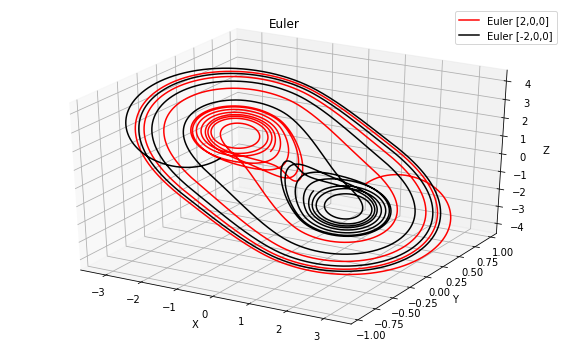

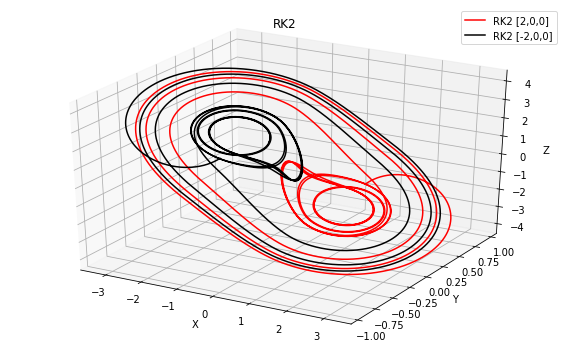

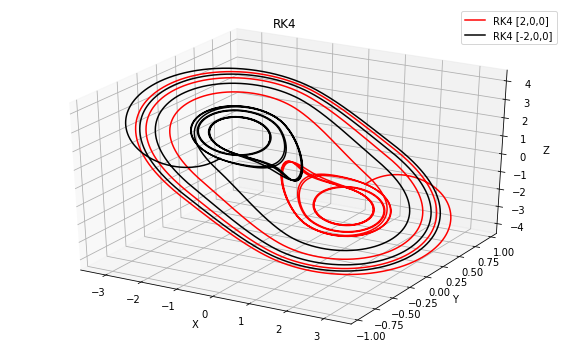

In [47]:
#Question n°1 

a = -1/7
b = 2/7 
alpha = 4.6
beta = 6.02
gamma = 0

def h(x):
    return(b*x+(a-b)/2*(abs(x+1) - abs(x-1)))

def f_x(x,y,z):
    return(alpha*(y - h(x)))

def f_y(x,y,z):
    return(x-y+z)

def f_z_1(x,y,z):
    return(-beta*y-gamma*z)


#Simulation
Tmax = 50
ht = 10**(-3)
N = int(Tmax/ht)
T = np.linspace(0,Tmax,N+1)

#Euler 
def Euler(state_0):
    states = np.transpose(np.array([state_0], dtype=float)) #initialisation de la matrice des états avec l'état initial
    for t in range(1,len(T)):
        x,y,z = states[:,t-1]
        next_state = [x + ht*f_x(x,y,z), y + ht*f_y(x,y,z), z + ht*f_z_1(x,y,z)]
        states = np.insert(states, np.shape(states)[1], next_state, axis=1)
    return(states)

#RK2:
def RK2_1(state_0):
    states = np.transpose(np.array([state_0], dtype=float)) #initialisation de la matrice des états avec l'état initial
    for t in range(1,len(T)):
        x,y,z = states[:,t-1]
        k1x = ht*f_x(x,y,z)
        k1y = ht*f_y(x,y,z)
        k1z = ht*f_z_1(x,y,z)
        k2x = ht*f_x(x+k1x/2,y+k1y/2,z+k1z/2)
        k2y = ht*f_y(x+k1x/2,y+k1y/2,z+k1z/2)
        k2z = ht*f_z_1(x+k1x/2,y+k1y/2,z+k1z/2)
        next_state = [x + k2x, y + k2y, z + k2z]
        states = np.insert(states, np.shape(states)[1], next_state, axis=1)
    return(states)

#RK4:
def RK4_1(state_0):
    states = np.transpose(np.array([state_0], dtype=float)) #initialisation de la matrice des états avec l'état initial
    for t in range(1,len(T)):
        x,y,z = states[:,t-1]
        k1x = ht*f_x(x,y,z)
        k1y = ht*f_y(x,y,z)
        k1z = ht*f_z_1(x,y,z)
        k2x = ht*f_x(x+k1x/2,y+k1y/2,z+k1z/2)
        k2y = ht*f_y(x+k1x/2,y+k1y/2,z+k1z/2)
        k2z = ht*f_z_1(x+k1x/2,y+k1y/2,z+k1z/2)
        k3x = ht*f_x(x+k2x/2,y+k2y/2,z+k2z/2)
        k3y = ht*f_y(x+k2x/2,y+k2y/2,z+k2z/2)
        k3z = ht*f_z_1(x+k2x/2,y+k2y/2,z+k2z/2)
        k4x = ht*f_x(x+k3x,y+k3y,z+k3z)
        k4y = ht*f_y(x+k3x,y+k3y,z+k3z)
        k4z = ht*f_z_1(x+k3x,y+k3y,z+k3z)
        next_state = [x + (1/6)*(k1x + 2*k2x + 2*k3x + k4x), y + (1/6)*(k1y + 2*k2y + 2*k3y + k4y), z + (1/6)*(k1z + 2*k2z + 2*k3z + k4z)]
        states = np.insert(states, np.shape(states)[1], next_state, axis=1)
    return(states)

# Tracé du résultat en 3D, Euler :
X1,Y1,Z1 = Euler([2,0,0])
X1_,Y1_,Z1_ = Euler([-2,0,0])
fig = plt.figure(figsize=(8,5))
ax = fig.gca(projection='3d')  #Affichage en 3D
ax.plot(X1, Y1, Z1, label='Euler [2,0,0]', color='red')  #Tracé de la première trajectoire
ax.plot(X1_, Y1_, Z1_, label='Euler [-2,0,0]', color='black') #Tracé de la deuxième trajectoire 
plt.title("Euler")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.legend()
plt.show()

# Tracé du résultat en 3D, RK2 :
X2,Y2,Z2 = RK2_1([2,0,0])
X2_,Y2_,Z2_ = RK2_1([-2,0,0])
fig = plt.figure(figsize=(8,5))
ax = fig.gca(projection='3d')  #Affichage en 3D
ax.plot(X2, Y2, Z2, label='RK2 [2,0,0]', color='red')  #Tracé de la première trajectoire
ax.plot(X2_,Y2_,Z2_, label='RK2 [-2,0,0]', color='black') #Tracé de la deuxième trajectoire
plt.title("RK2")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.legend()
plt.show()

# Tracé du résultat en 3D, RK4 :
X3,Y3,Z3 = RK4_1([2,0,0])
X3_,Y3_,Z3_ = RK4_1([-2,0,0])
fig = plt.figure(figsize=(8,5))
ax = fig.gca(projection='3d')  #Affichage en 3D
ax.plot(X3, Y3, Z3, label='RK4 [2,0,0]', color='red')  #Tracé de la première trajectoire
ax.plot(X3_,Y3_,Z3_, label='RK4 [-2,0,0]', color='black') #Tracé de la deuxième trajectoire
plt.title("RK4")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.legend()
plt.show()

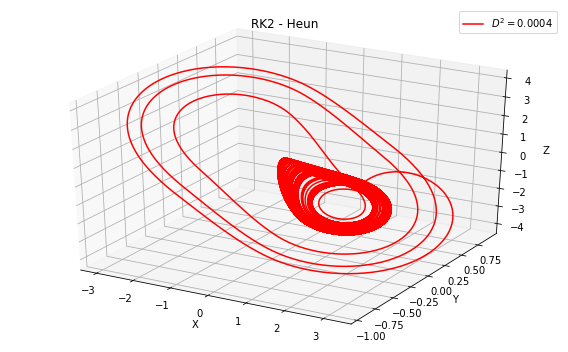

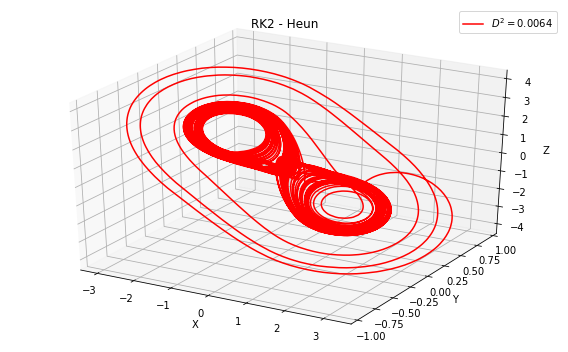

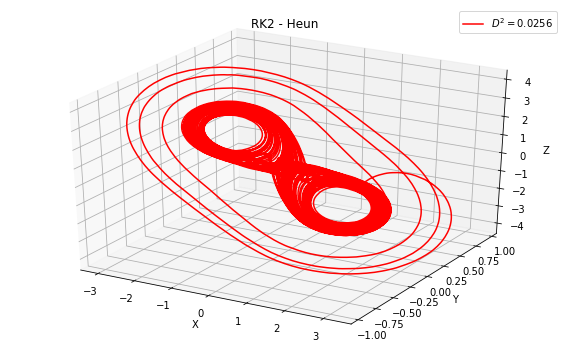

In [48]:
#Question 2

a = -1/7
b = 2/7 
alpha = 4.6
beta = 6.02
gamma = 0

Tmax = 500
ht = 2*10**(-2)
N = int(Tmax/ht)
T = np.linspace(0,Tmax,N+1)

D = 0.0004

def zeta(t, white_noise):
    return(white_noise[t])

def h(x):
    return(b*x+(a-b)/2*(abs(x+1) - abs(x-1)))

def f_x(x,y,z):
    return(alpha*(y - h(x)))

def f_y(x,y,z):
    return(x-y+z)

def f_z(x,y,z, t, white_noise):
    return(-beta*y-gamma*z + zeta(t, white_noise))

#Euler 
def Euler(D):
    mean = 0
    std = D**(1/2)
    white_noise = np.random.normal(mean, std, size=len(T))
    state_0  = [2,0,0]
    states = np.transpose(np.array([state_0], dtype=float)) #Initialisation de la matrice des états avec l'état initial
    for t in range(1,len(T)):
        if t%100000==0: #Suivi de boucles
            print(t)
        x,y,z = states[:,t-1]
        next_state = [x + ht*f_x(x,y,z), y + ht*f_y(x,y,z), z + ht*f_z(x,y,z, t, white_noise)]
        states = np.insert(states, np.shape(states)[1], next_state, axis=1)
    return(states)

def RK2_HEUN(D):
    mean = 0
    std = D**(1/2)
    white_noise = np.random.normal(mean, std, size=len(T)+1)
    state_0  = [2,0,0]
    states = np.transpose(np.array([state_0], dtype=float)) #initialisation de la matrice des états avec l'état initial
    for t in range(1,len(T)):
        if t%100000==0: #Suivi de boucles
            print(t)
        x,y,z = states[:,t-1]
        k1x = ht*f_x(x,y,z)
        k1y = ht*f_y(x,y,z)
        k1z = ht*f_z(x,y,z,t,white_noise)
        k2x = ht*f_x(x+k1x/2,y+k1y/2,z+k1z/2)
        k2y = ht*f_y(x+k1x/2,y+k1y/2,z+k1z/2)
        k2z = ht*f_z(x+k1x/2,y+k1y/2,z+k1z/2,t+1,white_noise)
        next_state = [x + (k1x+k2x)/2, y + (k2y+k2y)/2, z + (k2z+k2z)/2]
        states = np.insert(states, np.shape(states)[1], next_state, axis=1)
    return(states)

'''# Tracé du résultat en 3D, Euler :
X1,Y1,Z1 = Euler(0.0256)
fig = plt.figure()
ax = fig.gca(projection='3d')  #Affichage en 3D
ax.plot(X1, Y1, Z1, label='Euler [2,0,0]', color='red')  #Tracé de la première trajectoire
plt.title("Euler")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.show()'''

# Tracé du résultat en 3D, Heun, D=0.0004:
X1,Y1,Z1 = RK2_HEUN(0.0004)
fig = plt.figure(figsize=(8,5))
ax = fig.gca(projection='3d')  #Affichage en 3D
ax.plot(X1, Y1, Z1, color='red', label='$D^2=$0.0004')  #Tracé de la première trajectoire
plt.title("RK2 - Heun")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.legend()
plt.show()

# Tracé du résultat en 3D, Heun, D=0.0064:
X1,Y1,Z1 = RK2_HEUN(0.0064)
fig = plt.figure(figsize=(8,5))
ax = fig.gca(projection='3d')  #Affichage en 3D
ax.plot(X1, Y1, Z1, color='red', label='$D^2=$0.0064')  #Tracé de la première trajectoire
plt.title("RK2 - Heun")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.legend()
plt.show()

# Tracé du résultat en 3D, Heun, D=0.0256:
X1,Y1,Z1 = RK2_HEUN(0.0256)
fig = plt.figure(figsize=(8,5))
ax = fig.gca(projection='3d')  #Affichage en 3D
ax.plot(X1, Y1, Z1, color='red', label='$D^2=$0.0256')  #Tracé de la première trajectoire
plt.title("RK2 - Heun")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.legend()
plt.show()

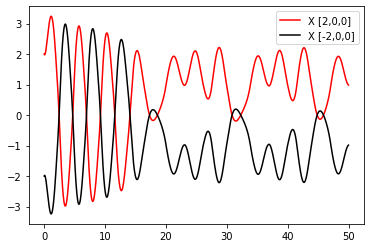

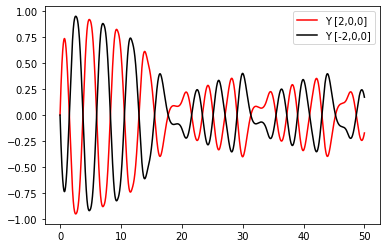

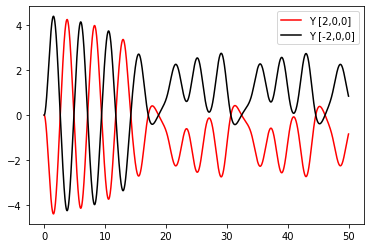

In [49]:
#Question 3

a = -1/7
b = 2/7 
alpha = 4.6
beta = 6.02
gamma = 0

Tmax = 50
ht = 2*10**(-3)
N = int(Tmax/ht)
T = np.linspace(0,Tmax,N+1)

X1,Y1,Z1 = RK4_1([2,0,0])
X2,Y2,Z2 = RK4_1([-2,0,0])


#Observons l'évolution' des coordonnées de la trajectoire
fig = plt.figure(figsize=(6,4))
plt.plot(T, X1, color='red', label='X [2,0,0]')
plt.plot(T, X2, color='black', label='X [-2,0,0]')
plt.legend()
plt.show()
fig = plt.figure(figsize=(6,4))
plt.plot(T, Y1, color='red', label='Y [2,0,0]')
plt.plot(T, Y2, color='black', label='Y [-2,0,0]')
plt.legend()
plt.show()
fig = plt.figure(figsize=(6,4))
plt.plot(T, Z1, color='red', label='Y [2,0,0]')
plt.plot(T, Z2, color='black', label='Y [-2,0,0]')
plt.legend()
plt.show()

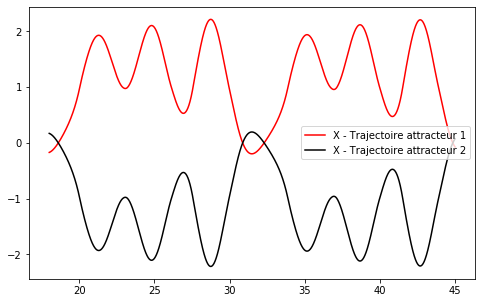

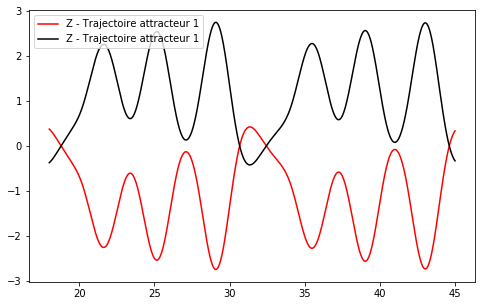

1.1517395261178434 -1.1559527344047282
-1.1517395261178434 1.1559527344047282


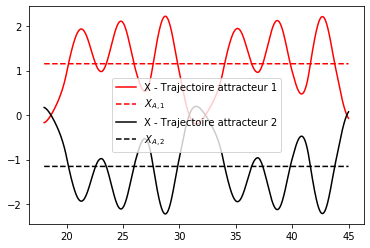

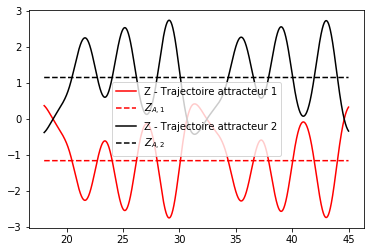

In [50]:
#Suite Question 3
T_ = T[9000:22500]

plt.figure(figsize=(8,5))
plt.plot(T[9000:22500],X1[9000:22500], label='X - Trajectoire attracteur 1', color='Red')
plt.plot(T[9000:22500],X2[9000:22500], label='X - Trajectoire attracteur 2', color='Black')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(T[9000:22500],Z1[9000:22500], label='Z - Trajectoire attracteur 1', color='Red')
plt.plot(T[9000:22500],Z2[9000:22500], label='Z - Trajectoire attracteur 1', color='Black')
plt.legend()
plt.show()

#Calculons les domaines des attracteurs:

x_attracteur1 = np.mean(X1[9000:22500])
x_attracteur2 = np.mean(X2[9000:22500])
z_attracteur1 = np.mean(Z1[9000:22500])
z_attracteur2 = np.mean(Z2[9000:22500])

rayonx_attracteur1 = np.max(X1) - x_attracteur1
rayonx_attracteur2 = np.max(X2) - x_attracteur2

rayony_attracteur1 = np.max(Z1) - z_attracteur1
rayony_attracteur2 = np.max(Z2) - z_attracteur2

print(x_attracteur1, z_attracteur1)
print(x_attracteur2, z_attracteur2)

#Observons les valeurs des coordonnées des centres attracteurs

plt.figure()
plt.plot(T[9000:22500],X1[9000:22500], label='X - Trajectoire attracteur 1', color='red')
plt.plot(T[9000:22500],[x_attracteur1 for t in T[9000:22500]], 'r--', label='$X_{A,1}$', color='red')
#plt.plot(T[9000:22500],[x_attracteur1 - 1 for t in T[9000:22500]], "r--", color='Red', label='Bornes X domaine 1')
#plt.plot(T[9000:22500],[x_attracteur1 + 1 for t in T[9000:22500]], "r--", color='Red')
plt.plot(T[9000:22500],X2[9000:22500], label='X - Trajectoire attracteur 2', color='black')
plt.plot(T[9000:22500],[x_attracteur2 for t in T[9000:22500]], 'r--', label='$X_{A,2}$', color='black')
plt.legend()
plt.show()

plt.figure()
plt.plot(T[9000:22500],Z1[9000:22500], label='Z - Trajectoire attracteur 1', color='red')
plt.plot(T[9000:22500],[z_attracteur1 for t in T[9000:22500]], 'r--', label='$Z_{A,1}$', color='red')
#plt.plot(T[9000:22500],[z_attracteur1 - 1 for t in T[9000:22500]], "r--", color='Red', label='Bornes Z domaine 1')
#plt.plot(T[9000:22500],[z_attracteur1 + 1 for t in T[9000:22500]], "r--", color='Red')
plt.plot(T[9000:22500],Z2[9000:22500], label='Z - Trajectoire attracteur 2', color='black')
plt.plot(T[9000:22500],[z_attracteur2 for t in T[9000:22500]], 'r--', label='$Z_{A,2}$', color='black')
plt.legend()
plt.show()

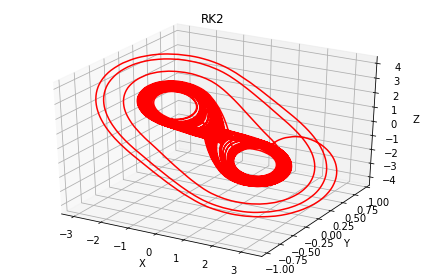

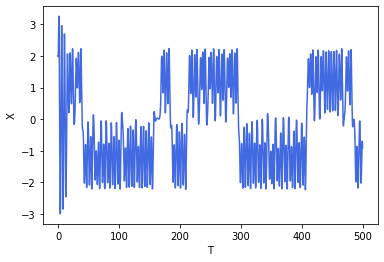

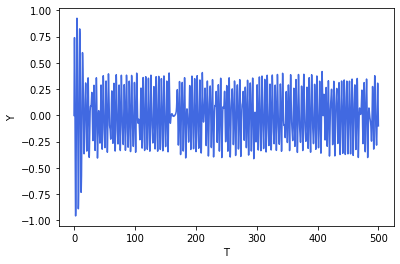

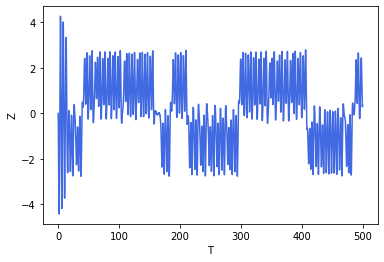

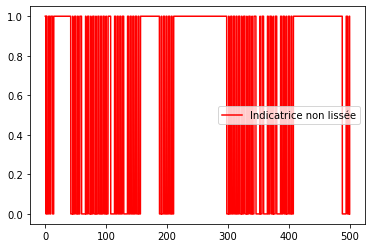

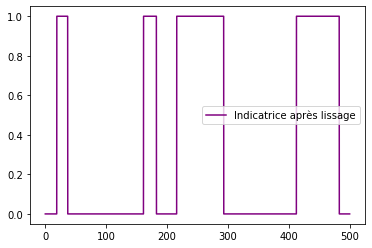

[1878, 3675, 16127, 18247, 21578, 29302, 41246, 48283]


In [51]:
#On définit les fonctions indicatrices des deux domaines attracteurs
def indicatrice_1(x,z):
    distx_au_centre = abs(x_attracteur1 - x)
    distz_au_centre = abs(z_attracteur1 - z)
    if distx_au_centre < 2 and distz_au_centre < 2:
        return(1)
    else:
        return(0)
    
def indicatrice_2(x,z):
    distx_au_centre = abs(x_attracteur2 - x)
    distz_au_centre = abs(z_attracteur2 - z)
    if distx_au_centre < 2 and distz_au_centre < 2:
        return(1)
    else:
        return(0)

#Observons les graphes de ces fonctions indicatrices pour un signal qui alterne entre les deux attracteurs
a = -1/7
b = 2/7 
alpha = 4.6
beta = 6.02
gamma = 0

Tmax = 500
ht = 10**-2
N = int(Tmax/ht)
T = np.linspace(0,Tmax,N+1)
X1,Y1,Z1 = RK2_HEUN(0.0256)
fig = plt.figure()
ax = fig.gca(projection='3d')  #Affichage en 3D
ax.plot(X1, Y1, Z1, label='RK2 [2,0,0]', color='red')  #Tracé de la première trajectoire
plt.title("RK2")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.show()

plt.plot(T, X1, color='royalblue', label='X')
plt.xlabel('T')
plt.ylabel('X')
plt.show()

plt.plot(T, Y1, color='royalblue', label='Y')
plt.xlabel('T')
plt.ylabel('Y')
plt.show()

plt.plot(T, Z1, color='royalblue', label='Z')
plt.xlabel('T')
plt.ylabel('Z')
plt.show()

plt.plot(T, [indicatrice_1(x,z) for (x,z) in zip(X1,Y1)], color='Red', label='Indicatrice non lissée')
plt.legend()
plt.show()

#Le but de cette fonction est de lisser l'allure des fonctions indicatrices.
def final_process(values):
    means = [0] * len(values)
    for t in range(500,len(values)-500):
        means[t] = 1
        for k in range(t-500,t+500):
            if values[k] < 1:
                means[t] = 0
                break
    return(means)

def indices_changement(values):
    changement = []
    means = final_process(values)
    for i in range(1,len(means)):
        if means[i] != means[i-1]:
            changement.append(i)
    return(changement)

plt.plot(T, final_process([indicatrice_1(x,z) for (x,z) in zip(X1,Y1)]), color="Purple", label='Indicatrice après lissage')
plt.legend()
plt.show()

print(indices_changement([indicatrice_1(x,z) for (x,z) in zip(X1,Y1)]))

0.01
100000
200000


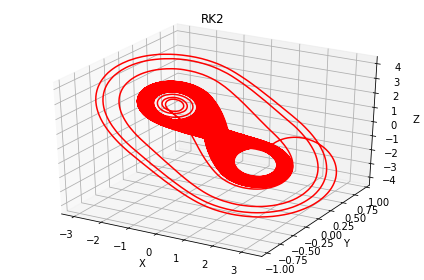

0.02
100000
200000


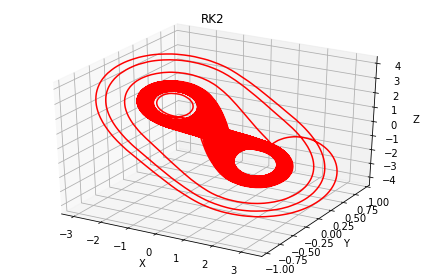

0.03
100000
200000


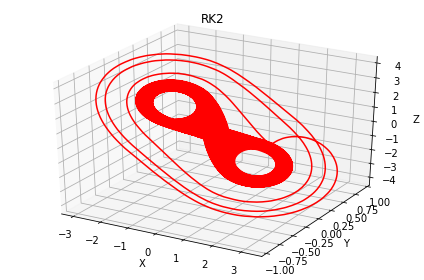

0.04
100000
200000


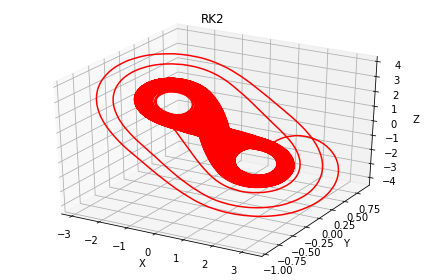

0.05
100000
200000


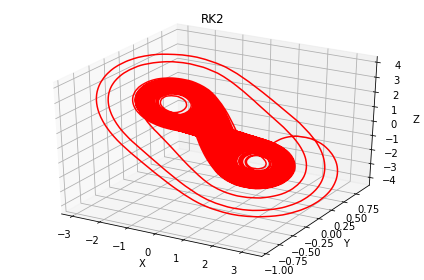

0.060000000000000005
100000
200000


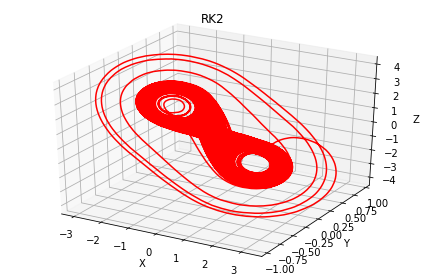

0.06999999999999999
100000
200000


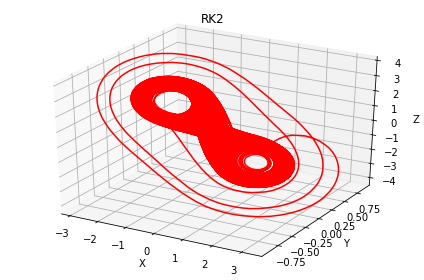

0.08
100000
200000


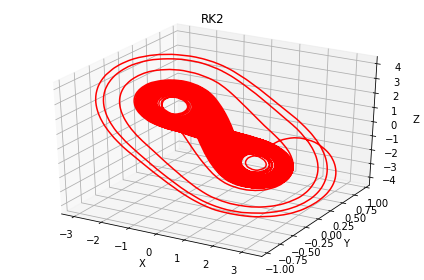

0.09
100000
200000


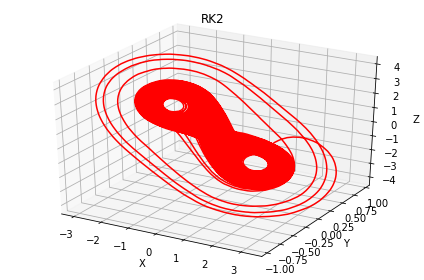

0.09999999999999999
100000
200000


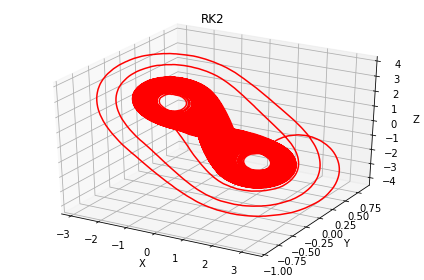

0.11
100000
200000


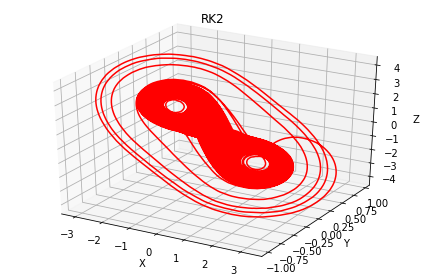

0.12
100000
200000


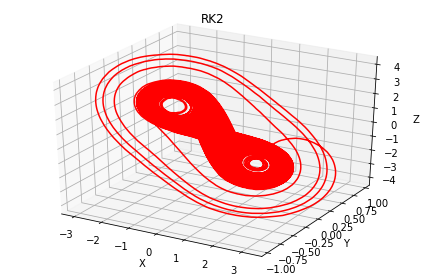

0.13
100000
200000


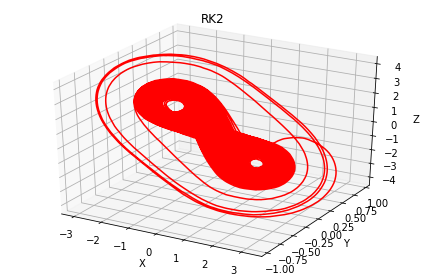

0.14
100000
200000


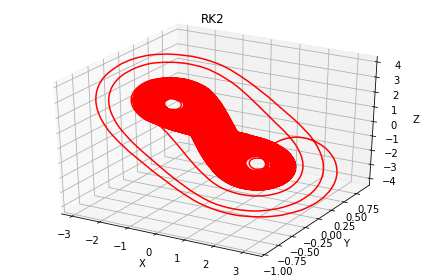

0.15000000000000002
100000
200000


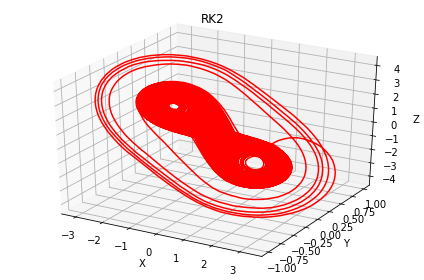

0.16
100000
200000


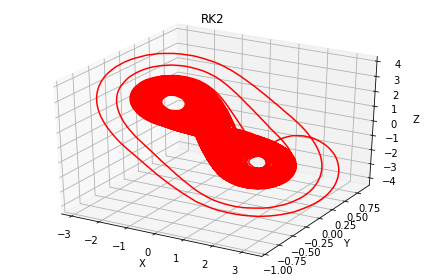

0.17
100000
200000


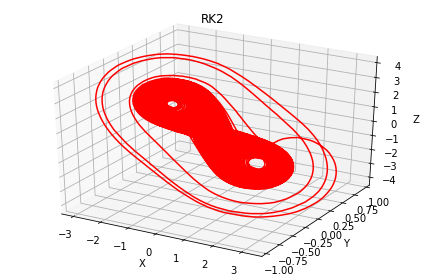

In [55]:
#Question 5:

#Calcul des trajectoires pour chaque valeur de D
a = -1/7
b = 2/7 
alpha = 4.6
beta = 6.02
gamma = 0

Tmax = 2500
ht = 10**-2
N = int(Tmax/ht)
T = np.linspace(0,Tmax,N+1)

Ds = np.linspace(0.01,0.17,17)
data = []
for D in Ds:
    print(D)
    X1,Y1,Z1 = RK2_HEUN(D)
    data.append([X1,Z1])
    fig = plt.figure()
    ax = fig.gca(projection='3d')  
    ax.plot(X1, Y1, Z1, label='RK2 [2,0,0]', color='red')  # Pour vérifier la convergence
    plt.title("RK2")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.tight_layout()
    plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


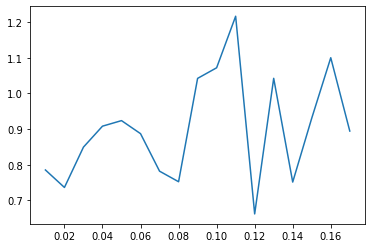

In [63]:
#Suite Question 5

#Calcul des écarts entre les changements d'attracteur.
def intervalles(indices):
    inter = []
    for i in range(1, len(indices)):
        inter.append(indices[i] - indices[i-1])
    return(inter)

def statistiques_intervalles(inter):
    mean = np.mean(np.array(inter))
    var = np.var(np.array(inter))
    return(var**(1/2)/mean)

rapports = []
for k in range(len(data)):
    print(k)
    X,Y = data[k]
    indicatrice_lisse = final_process([indicatrice_1(x,z) for (x,z) in zip(X,Y)])
    indices = indices_changement(indicatrice_lisse)
    inter = intervalles(indices)
    rapports.append(statistiques_intervalles(inter))

plt.plot(Ds, rapports)
plt.show()